In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [52]:
df=pd.read_csv('dataset\Admission_Predict_Ver1.1.csv')

In [53]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [54]:
df=pd.read_csv('my_dataframe.csv')
df.head()

,Unnamed: 0,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0,337,118,4,4.5,4.5,9.65,1,0.92
1,1,324,107,4,4.0,4.5,8.87,1,0.76
2,2,316,104,3,3.0,3.5,8.00,1,0.72
3,3,322,110,3,3.5,2.5,8.67,1,0.80
4,4,314,103,2,2.0,3.0,8.21,0,0.65


We are dropping the Unnamed column to make the prediction easier and accurate.

In [55]:
df = df.drop(columns=['Unnamed: 0'])
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [56]:
X = df.drop(columns=['Chance of Admit '])
y = df['Chance of Admit ']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)
print(y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
492        332          108                  5  4.5   4.0  9.02         1
493        337          117                  5  5.0   5.0  9.87         1
494        330          120                  5  4.5   5.0  9.56         1
495        312          103                  4  4.0   5.0  8.43         0
496        327          113                  4  4.5   4.5  9.04         0

[497 rows x 7 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
492    0.87
493 

We have split the dataset into training and test data. X represents the independent features and Y represents the traget feature or the dependent feature

In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We have done feature scaling inorder to increase the model performance. 

Linear Model

In [58]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

Random Forest Model

In [59]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

support Vector Machines

In [60]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)

mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

In [61]:
print(f"Linear Regression - Mean Squared Error: {mse_linear}")
print(f"Linear Regression - R-squared: {r2_linear}")
print("---------------------------------------------------------------")
print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")
print("---------------------------------------------------------------")
print(f"SVR - Mean Squared Error: {mse_svr}")
print(f"SVR - R-squared: {r2_svr}")
print("---------------------------------------------------------------")

Linear Regression - Mean Squared Error: 0.003673319896222301
Linear Regression - R-squared: 0.7958581715074224
---------------------------------------------------------------
Random Forest - Mean Squared Error: 0.004082493200000003
Random Forest - R-squared: 0.7731186909385148
---------------------------------------------------------------
SVR - Mean Squared Error: 0.004707086774065098
SVR - R-squared: 0.738407400368507
---------------------------------------------------------------


In [67]:
# Cross-validation scores for each model
cv_scores_linear = cross_val_score(linear_model, X, y, cv=5, scoring='r2')
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
cv_scores_svr = cross_val_score(svr_model, X, y, cv=5, scoring='r2')

In [63]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test_scaled)

mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest - Mean Squared Error: {mse_best_rf}")
print(f"Tuned Random Forest - R-squared: {r2_best_rf}")

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Tuned Random Forest - Mean Squared Error: 0.003952978219316255
Tuned Random Forest - R-squared: 0.7803163828686818


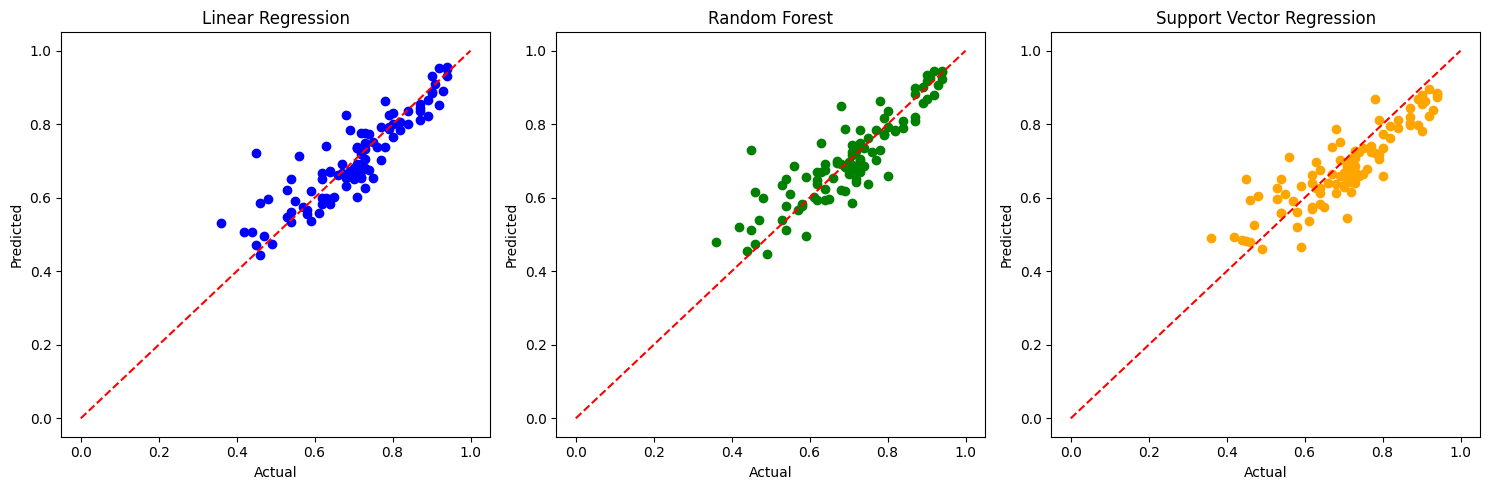

In [64]:
# Plot Prediction vs Actual for all models
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression")

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_test, y_pred_rf, color='green')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Random Forest")

# SVR
plt.subplot(1, 3, 3)
plt.scatter(y_test, y_pred_svr, color='orange')
plt.plot([0, 1], [0, 1], '--', color='red')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Support Vector Regression")

plt.tight_layout()
plt.show()

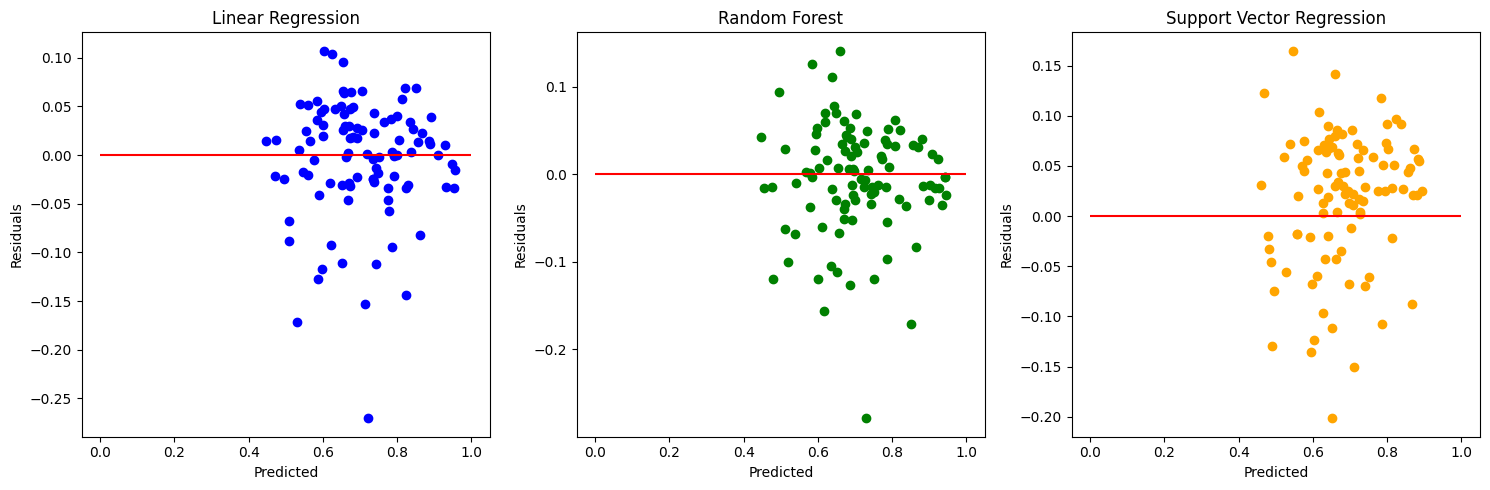

In [65]:
# Plot Residuals for all models
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.scatter(y_pred_linear, y_test - y_pred_linear, color='blue')
plt.hlines(y=0, xmin=0, xmax=1, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Linear Regression")

# Random Forest
plt.subplot(1, 3, 2)
plt.scatter(y_pred_rf, y_test - y_pred_rf, color='green')
plt.hlines(y=0, xmin=0, xmax=1, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Random Forest")

# SVR
plt.subplot(1, 3, 3)
plt.scatter(y_pred_svr, y_test - y_pred_svr, color='orange')
plt.hlines(y=0, xmin=0, xmax=1, color='red')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Support Vector Regression")

plt.tight_layout()
plt.show()


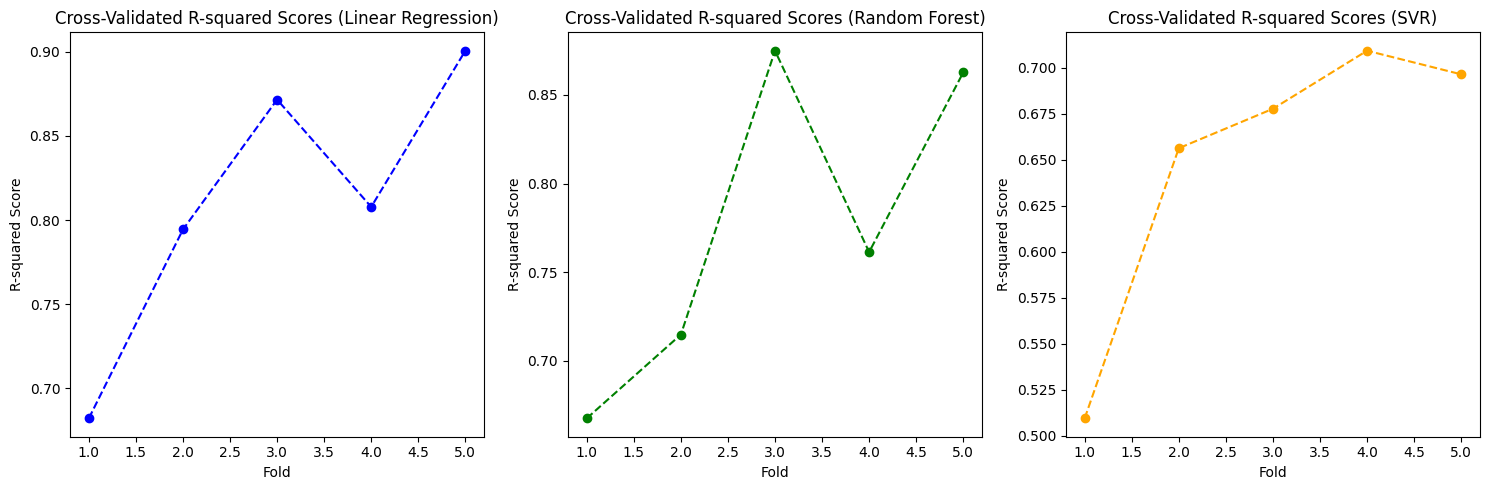

In [70]:
# Plot Cross-Validated R-squared Scores for All Models
plt.figure(figsize=(15, 5))

# Linear Regression
plt.subplot(1, 3, 1)
plt.plot(range(1, len(cv_scores_linear) + 1), cv_scores_linear, marker='o', linestyle='--', color='blue')
plt.xlabel("Fold")
plt.ylabel("R-squared Score")
plt.title("Cross-Validated R-squared Scores (Linear Regression)")

# Random Forest
plt.subplot(1, 3, 2)
plt.plot(range(1, len(cv_scores_rf) + 1), cv_scores_rf, marker='o', linestyle='--', color='green')
plt.xlabel("Fold")
plt.ylabel("R-squared Score")
plt.title("Cross-Validated R-squared Scores (Random Forest)")

# SVR
plt.subplot(1, 3, 3)
plt.plot(range(1, len(cv_scores_svr) + 1), cv_scores_svr, marker='o', linestyle='--', color='orange')
plt.xlabel("Fold")
plt.ylabel("R-squared Score")
plt.title("Cross-Validated R-squared Scores (SVR)")

plt.tight_layout()
plt.show()

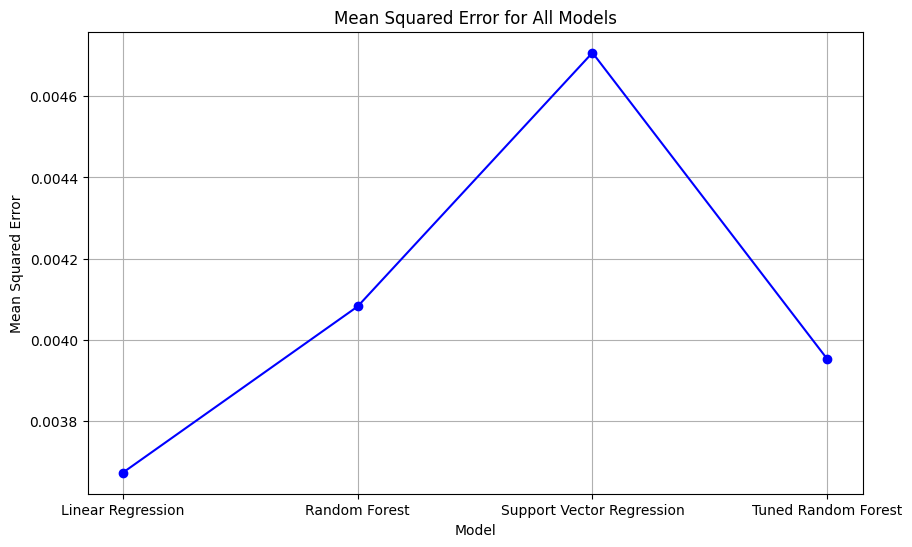

In [72]:
# Plot Loss (Mean Squared Error) for All Models as a Line Graph
mse_scores = {
    'Linear Regression': mse_linear,
    'Random Forest': mse_rf,
    'Support Vector Regression': mse_svr,
    'Tuned Random Forest': mse_best_rf
}

plt.figure(figsize=(10, 6))
plt.plot(list(mse_scores.keys()), list(mse_scores.values()), marker='o', linestyle='-', color='blue')
plt.xlabel("Model")
plt.ylabel("Mean Squared Error")
plt.title("Mean Squared Error for All Models")
plt.grid(True)
plt.show()